In [1]:
import numpy as np
P = np.random.rand(5, 2)
Q = np.random.rand(7, 2)

In [1]:
import numpy as np

def k_nearest_neighbors(points, k):
    num_points = len(points)
    distances = np.sqrt(np.sum((points[:, np.newaxis] - points) ** 2, axis=-1))
    np.fill_diagonal(distances, np.inf)  # Set diagonal elements to infinity to avoid self-matches
    indices = np.argpartition(distances, k)[:, :k]
    return indices

P = np.array([[0,0], [0.2, 0.22], [0.1, -0.1], [1,1], [1.1, 0.9], [0.8, 0.9],
              [1.1, 0.63], [0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8,-0.23], [0.8, 0.6]])
k = 3

nearest_neighbors_indices = k_nearest_neighbors(P, k)
print(nearest_neighbors_indices)

[[ 1  7  2]
 [ 0  2  8]
 [ 0  1  7]
 [ 4  5  6]
 [ 3  5  6]
 [ 3  4 11]
 [ 3 11  4]
 [10  8  9]
 [10  7  9]
 [10  7  8]
 [ 9  7  8]
 [ 4  6  5]]


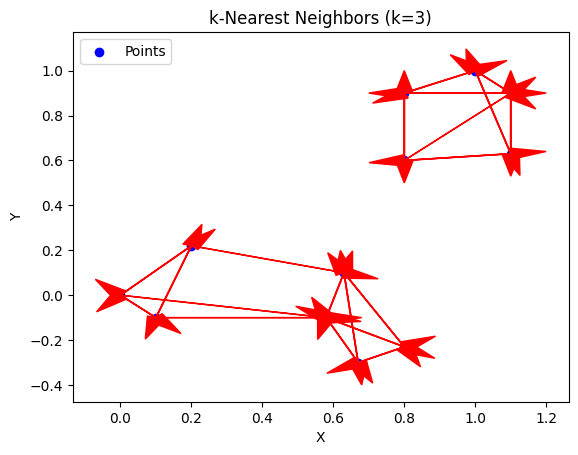

In [2]:
import matplotlib.pyplot as plt

def plot_k_nearest_neighbors(points, k, indices):
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Points')

    for i, point in enumerate(points):
        neighbors = points[indices[i]]
        for neighbor in neighbors:
            plt.arrow(point[0], point[1], neighbor[0]-point[0], neighbor[1]-point[1],
                      head_width=0.05, head_length=0.1, fc='red', ec='red')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'k-Nearest Neighbors (k={k})')
    plt.legend()
    plt.show()

plot_k_nearest_neighbors(P, k, nearest_neighbors_indices)